<a href="https://colab.research.google.com/github/Santoshabhi/Data-analytics/blob/main/website_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving the cleverprogrammer.csv to the cleverprogrammer.csv


In [ ]:
import pandas as pd

data = pd.read_csv("the cleverprogrammer.csv", encoding='utf-8')  # or try encoding='latin1' if there's an error
print(data.head())


         Date  Views
0  01-06-2021   7831
1  02-06-2021   7798
2  03-06-2021   7401
3  04-06-2021   7054
4  05-06-2021   7973


In [ ]:
data["Date"] = pd.to_datetime(data["Date"], format="%d-%m-%Y")
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


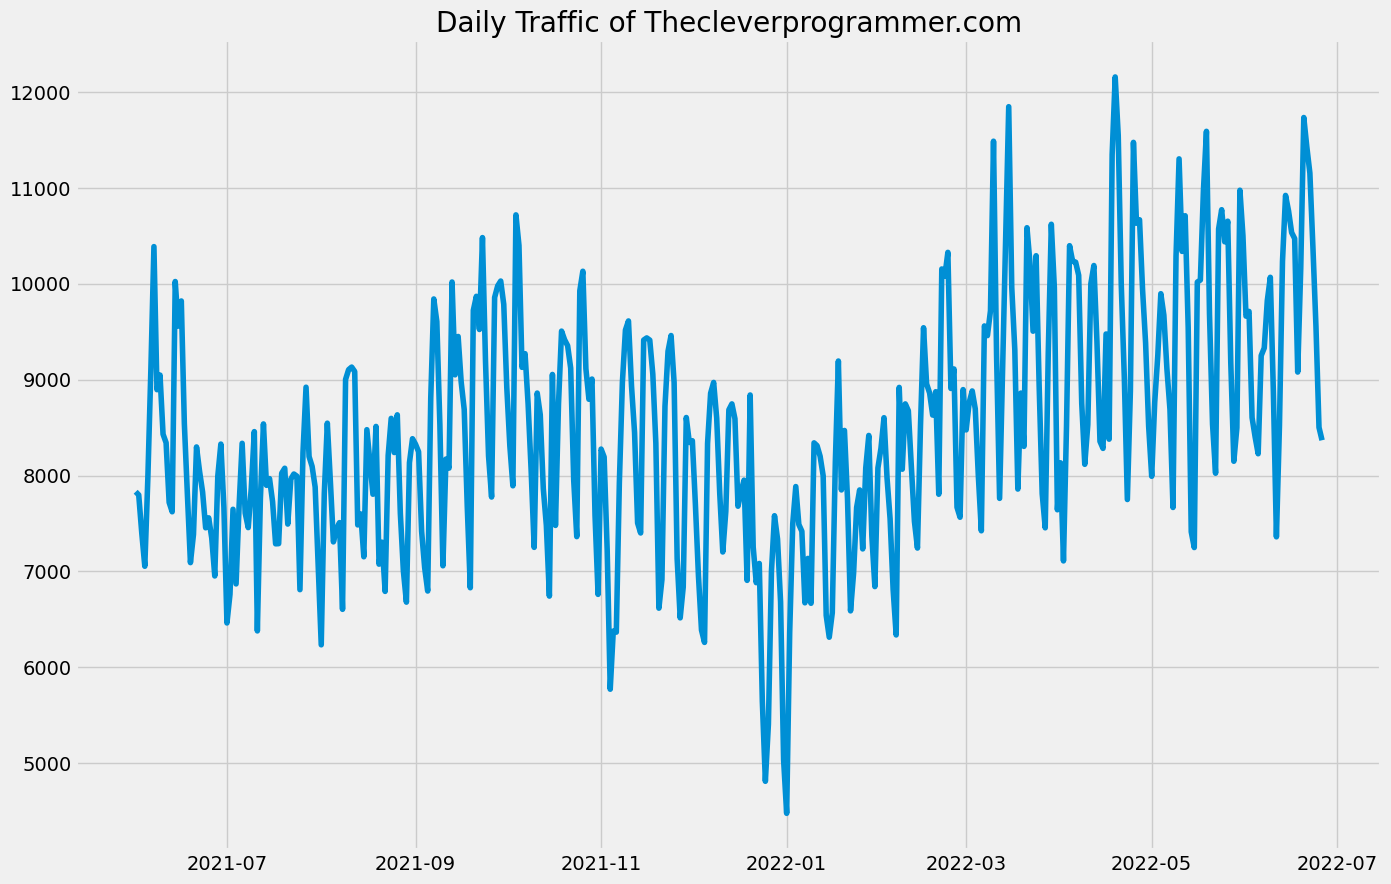

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

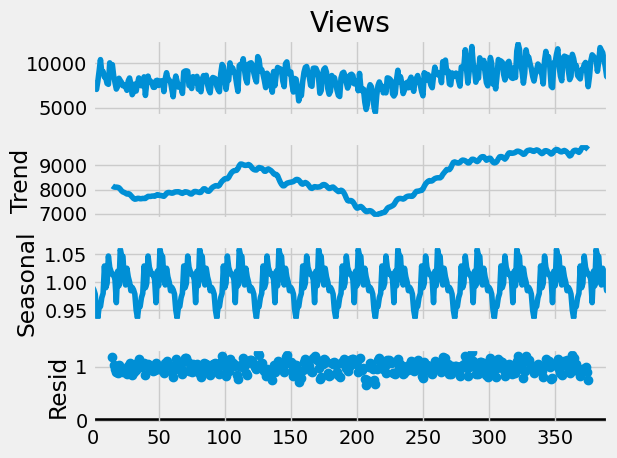

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data["Views"],
                            model='multiplicative',
                            period=30)

fig = result.plot()


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

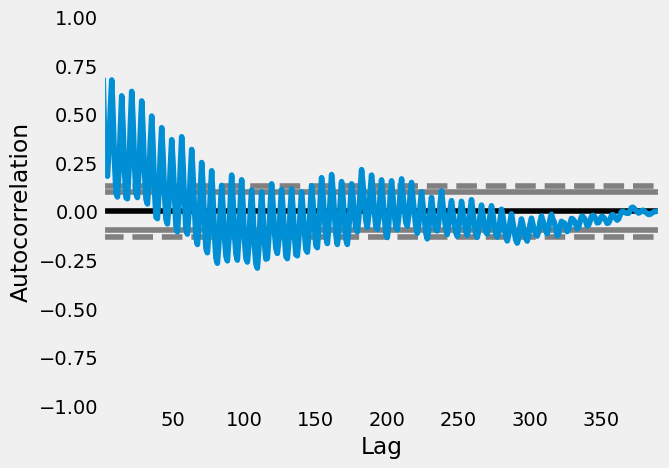

In [ ]:
pd.plotting.autocorrelation_plot(data["Views"])

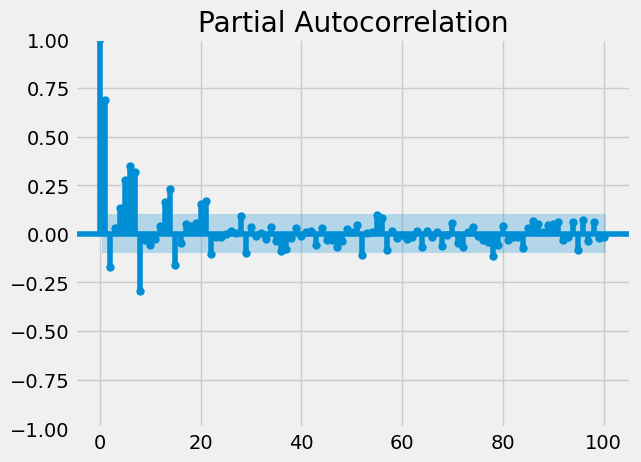

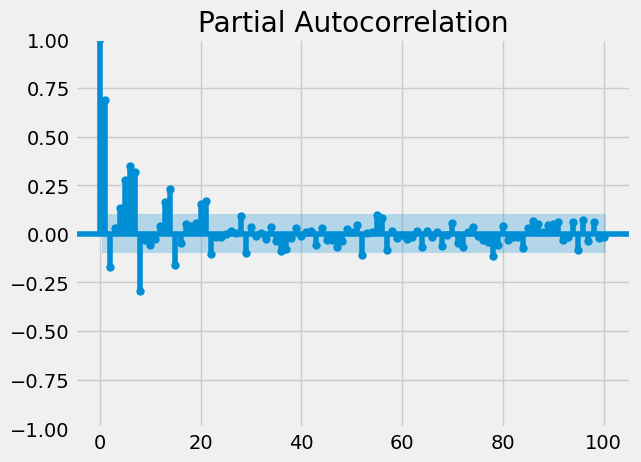

In [ ]:
plot_pacf(data["Views"], lags = 100)

In [ ]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.317
Date:                            Thu, 29 May 2025   AIC                           6228.634
Time:                                    15:23:44   BIC                           6287.658
Sample:                                         0   HQIC                          6252.060
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7746      0.130      5.950      0.000       0.519       1.030
ar.L2         -0.7913      0.134   

In [ ]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9845.354883
392    10784.530473
393    10778.072164
394     9890.789562
395     8791.804363
396     8239.286206
397     8913.091618
398     9671.282764
399    10247.634685
400    10645.646149
401     9911.908138
402     9396.054448
403     9043.629238
404     9050.204216
405    10517.592281
406    11001.954220
407    10942.529666
408    10163.813655
409     9500.160685
410     8635.880949
411     9147.186320
412    10356.691422
413    10595.112839
414    10814.600896
415    10309.943750
416     9497.009196
417     9032.657944
418     9120.276922
419     9845.640925
420    10213.772323
421    10746.649677
422     9963.588028
423     9588.532750
424     9052.406021
425     8777.994849
426    10087.055617
427    10828.160561
428    10936.402815
429    10472.723468
430     9500.019429
431     8691.467741
432     8675.426743
433    10009.878896
434    10490.798007
435    10874.052261
436    10553.369327
437     9397.525801
438     9175.328134
439     9305.121082
440    10239.702112


<Axes: >

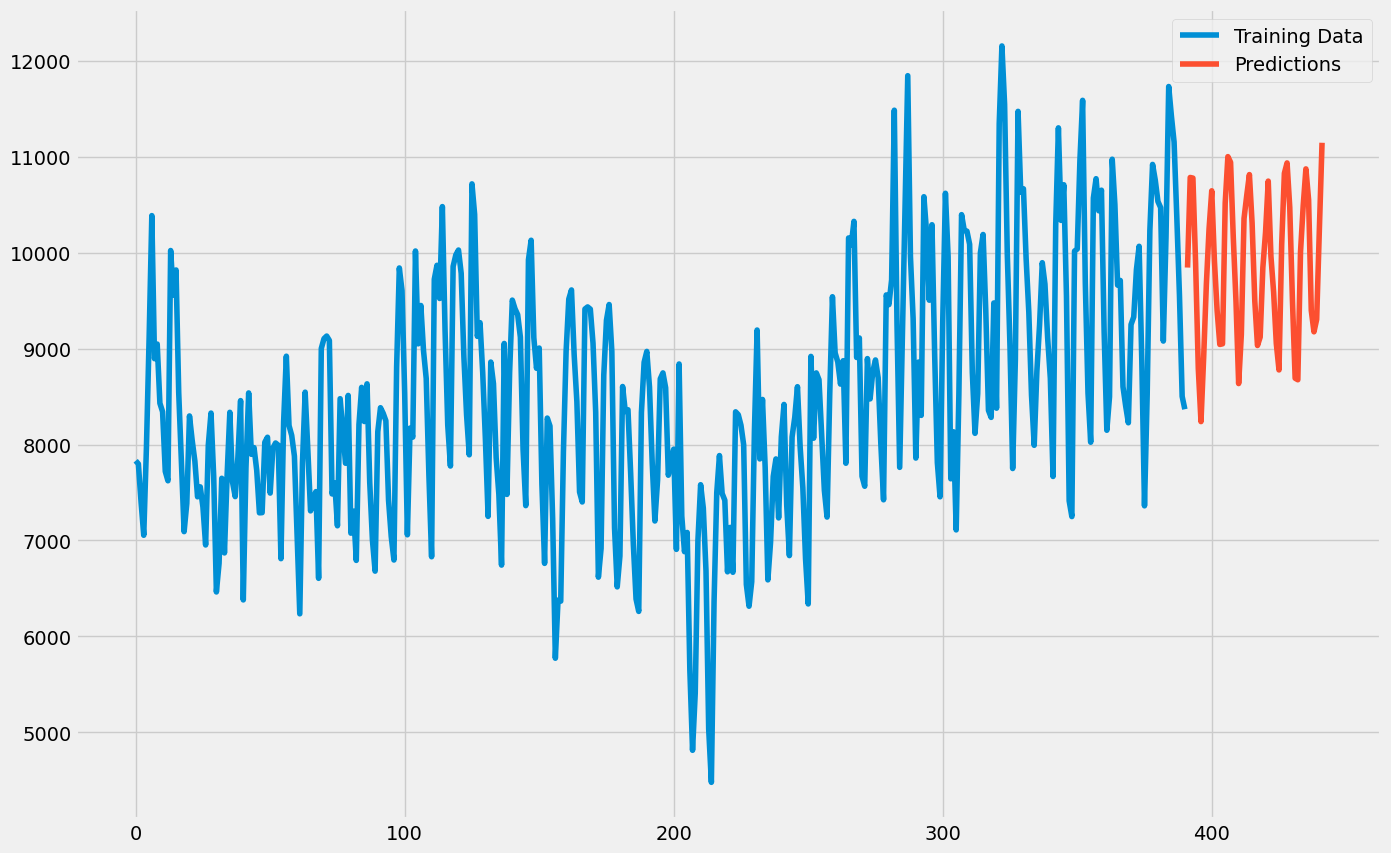

In [ ]:
data["Views"].plot(legend=True, label="Training Data",
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")